# Classification with MNIST Dataset

### 1. Import Dataset

In [1]:
from sklearn import datasets

digits = datasets.load_digits()  # Import MNIST dataset

In [2]:
X = digits.data
y = digits.target

print (digits.target_names) # see digits

[0 1 2 3 4 5 6 7 8 9]


Example X[0]

In [3]:
print (X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


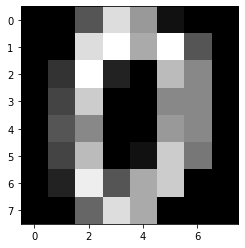

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Test in 0
plt.imshow(np.reshape(X[0], (8,8)), cmap=plt.cm.gray)
plt.show()

### 2. Displat data 0-9 digits

In [5]:
import matplotlib.pyplot as plt
import numpy as np

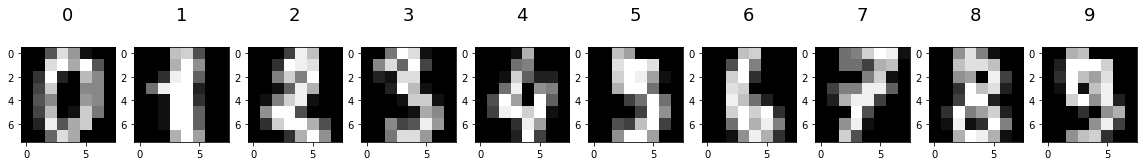

In [6]:
plt.figure(figsize=(20,10))

for index, (image, label) in enumerate(zip(X[0:10], y[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray) #gray
    plt.title('%i\n' % label, fontsize = 18)

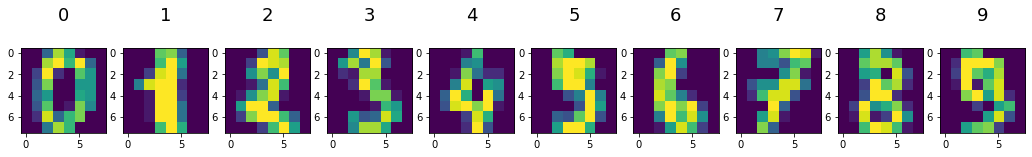

In [7]:
plt.figure(figsize=(18,8))

for index, (image, label) in enumerate(zip(X[0:10], y[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.viridis) #viridis
    plt.title('%i\n' % label, fontsize = 18)

### 3.Split for Train/Test Model

Library sklearn

* Logistic Regression (Algorithm for Classification) in  Linear Model
* train / test split (train / test) in model selection

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) # Train 70%, Test 30%

In [10]:
print (X_train.shape)
print (X_test.shape)

(1257, 64)
(540, 64)


### 4. Logistic Regression Model in name of "LogReg" 
* Train model with X_train, y_train

In [11]:
LogReg = LogisticRegression()

In [12]:
LogReg.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 5. Evaluation Model with test data (X_test, y_test)

* Accuracy Score

In [13]:
y_pred = LogReg.predict(X_test) 

In [14]:
score = LogReg.score(X_test, y_test)
score = round(score*100, 2)
print('Accuracy =', score)

Accuracy = 95.37


* Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  2, 49,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 51,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 53,  4],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 55]], dtype=int64)

In [16]:
import seaborn as sns

In [17]:
cm = confusion_matrix(y_test, y_pred)

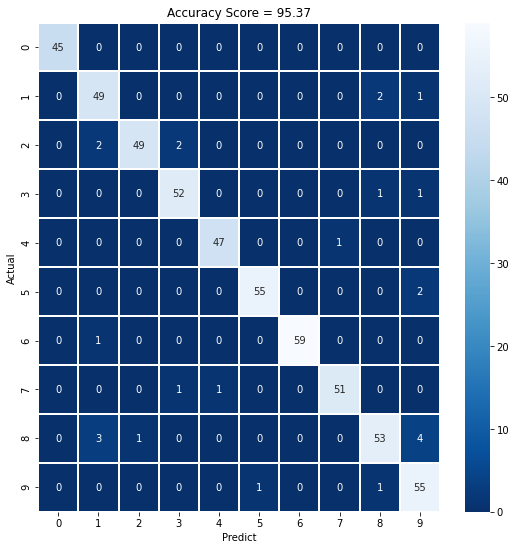

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predict');
figure_title = 'Accuracy Score = {0}'.format(score)
plt.title(figure_title, size = 12);